In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = "cifar10"

In [68]:
baseline_sim_df = pd.read_csv(f"{dataset}/baseline_with_linear_version_0.csv")
mixed_sim_df = pd.read_csv(f"{dataset}/mixed_prototypes_with_linear_version_0.csv")
baseline_ce_df = pd.read_csv(f"{dataset}/baseline_softmax_with_linear_version_0.csv")
mixed_ce_df = pd.read_csv(f"{dataset}/mixed_prototypes_softmax_with_linear_version_0.csv")

In [69]:
!cp -r /mnt/c/Users/dmytro/Downloads/cifar10/. cifar10/.

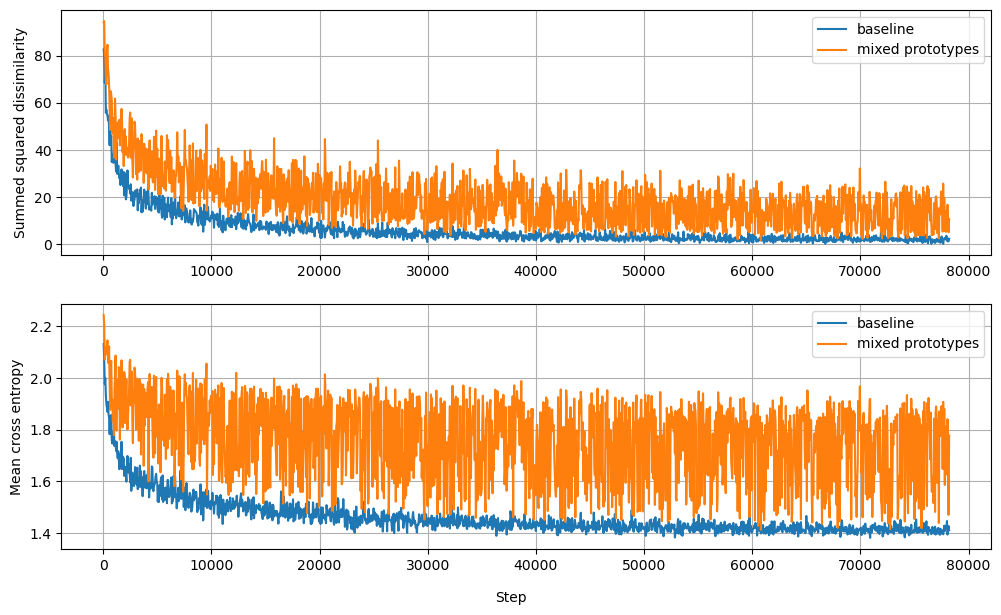

In [70]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,7))

ax[0].grid()
ax[0].set_ylabel("Summed squared dissimilarity")
ax[0].plot(baseline_sim_df["Step"], baseline_sim_df["Value"], label="baseline")
ax[0].plot(mixed_sim_df["Step"], mixed_sim_df["Value"], label="mixed prototypes")
ax[0].legend()

ax[1].grid()
ax[1].set_ylabel("Mean cross entropy")
ax[1].plot(baseline_ce_df["Step"], baseline_ce_df["Value"], label="baseline")
ax[1].plot(mixed_ce_df["Step"], mixed_ce_df["Value"], label="mixed prototypes")
ax[1].legend()

fig.text(0.5, 0.04, "Step", ha='center', va='center')

plt.savefig(f"{dataset}/{dataset}_losses.png", bbox_inches='tight')

In [71]:
val_acc_baseline_sim_df = pd.read_csv(f"{dataset}/baseline_with_linear_version_0_val_accuracy.csv")
val_acc_mixed_sim_df = pd.read_csv(f"{dataset}/mixed_prototypes_with_linear_version_0_val_accuracy.csv")
val_acc_baseline_ce_df = pd.read_csv(f"{dataset}/baseline_softmax_with_linear_version_0_val_accuracy.csv")
val_acc_mixed_ce_df = pd.read_csv(f"{dataset}/mixed_prototypes_softmax_with_linear_version_0_val_accuracy.csv")

val_loss_baseline_sim_df = pd.read_csv(f"{dataset}/baseline_with_linear_version_0_val_loss.csv")
val_loss_mixed_sim_df = pd.read_csv(f"{dataset}/mixed_prototypes_with_linear_version_0_val_loss.csv")
val_loss_baseline_ce_df = pd.read_csv(f"{dataset}/baseline_softmax_with_linear_version_0_val_loss.csv")
val_loss_mixed_ce_df = pd.read_csv(f"{dataset}/mixed_prototypes_softmax_with_linear_version_0_val_loss.csv")

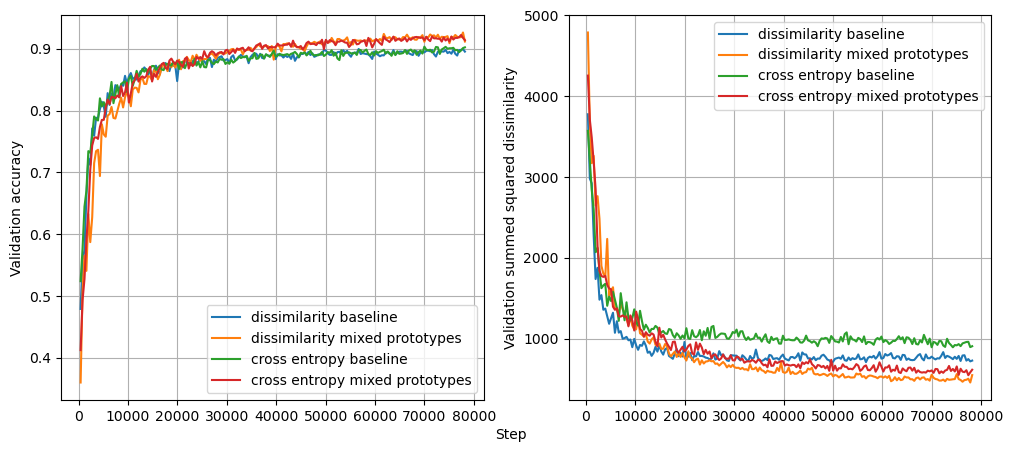

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

ax[0].grid()
ax[0].set_ylabel("Validation accuracy")
ax[0].plot(val_acc_baseline_sim_df["Step"], val_acc_baseline_sim_df["Value"], label="dissimilarity baseline")
ax[0].plot(val_acc_mixed_sim_df["Step"], val_acc_mixed_sim_df["Value"], label="dissimilarity mixed prototypes")
ax[0].plot(val_acc_baseline_ce_df["Step"], val_acc_baseline_ce_df["Value"], label="cross entropy baseline")
ax[0].plot(val_acc_mixed_ce_df["Step"], val_acc_mixed_ce_df["Value"], label="cross entropy mixed prototypes")
ax[0].legend()

ax[1].grid()
ax[1].set_ylabel("Validation summed squared dissimilarity")
ax[1].plot(val_loss_baseline_sim_df["Step"], val_loss_baseline_sim_df["Value"], label="dissimilarity baseline")
ax[1].plot(val_loss_mixed_sim_df["Step"], val_loss_mixed_sim_df["Value"], label="dissimilarity mixed prototypes")
ax[1].plot(val_loss_baseline_ce_df["Step"], val_loss_baseline_ce_df["Value"], label="cross entropy baseline")
ax[1].plot(val_loss_mixed_ce_df["Step"], val_loss_mixed_ce_df["Value"], label="cross entropy mixed prototypes")
ax[1].legend()

fig.text(0.5, 0.04, "Step", ha='center', va='center')

plt.savefig(f"{dataset}/{dataset}_val.png", bbox_inches='tight')

In [96]:
acc = val_acc_baseline_sim_df["Value"].max()
idx = val_acc_baseline_sim_df["Value"].idxmax()
ssd = val_loss_baseline_sim_df["Value"].iloc[idx]
print(f"Baseline - accuracy: {acc:.4f}, ssd: {ssd:.4f}")

Baseline - accuracy: 0.8998, ssd: 709.4269


In [98]:
acc = val_acc_mixed_sim_df["Value"].max()
idx = val_acc_mixed_sim_df["Value"].idxmax()
ssd = val_loss_mixed_sim_df["Value"].iloc[idx]
print(f"Mixed prototypes - accuracy: {acc:.4f}, ssd: {ssd:.4f}")

Mixed prototypes - accuracy: 0.9264, ssd: 457.2779


In [99]:
acc = val_acc_baseline_ce_df["Value"].max()
idx = val_acc_baseline_ce_df["Value"].idxmax()
ssd = val_loss_baseline_ce_df["Value"].iloc[idx]
print(f"Cross entropy baseline - accuracy: {acc:.4f}, ssd: {ssd:.4f}")

Cross entropy baseline - accuracy: 0.9035, ssd: 893.7039


In [100]:
acc = val_acc_mixed_ce_df["Value"].max()
idx = val_acc_mixed_ce_df["Value"].idxmax()
ssd = val_loss_mixed_ce_df["Value"].iloc[idx]
print(f"Cross entropy mixed prototypes - accuracy: {acc:.4f}, ssd: {ssd:.4f}")

Cross entropy mixed prototypes - accuracy: 0.9224, ssd: 547.3871
